# NLP Text Preprocessing Notebook
This notebook covers:
- Text Cleaning
- Tokenization
- Stopwords
- Stemming & Lemmatization
- N-grams
- Basic Frequency Analysis


In [1]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.util import ngrams
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
text = "Hello!!! This is NLP Class 2025. Learn Text Preprocessing @Google Meet. :)"
cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
cleaned_text = cleaned_text.lower().strip()
cleaned_text

'hello this is nlp class  learn text preprocessing google meet'

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(cleaned_text)
tokens

['hello',
 'this',
 'is',
 'nlp',
 'class',
 'learn',
 'text',
 'preprocessing',
 'google',
 'meet']

In [5]:
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]
filtered_tokens

['hello', 'nlp', 'class', 'learn', 'text', 'preprocessing', 'google', 'meet']

In [6]:
ps = PorterStemmer()
stemmed = [ps.stem(word) for word in filtered_tokens]
stemmed

['hello', 'nlp', 'class', 'learn', 'text', 'preprocess', 'googl', 'meet']

In [7]:
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(word) for word in filtered_tokens]
lemmatized

['hello', 'nlp', 'class', 'learn', 'text', 'preprocessing', 'google', 'meet']

In [8]:
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))
bigrams, trigrams

([('hello', 'this'),
  ('this', 'is'),
  ('is', 'nlp'),
  ('nlp', 'class'),
  ('class', 'learn'),
  ('learn', 'text'),
  ('text', 'preprocessing'),
  ('preprocessing', 'google'),
  ('google', 'meet')],
 [('hello', 'this', 'is'),
  ('this', 'is', 'nlp'),
  ('is', 'nlp', 'class'),
  ('nlp', 'class', 'learn'),
  ('class', 'learn', 'text'),
  ('learn', 'text', 'preprocessing'),
  ('text', 'preprocessing', 'google'),
  ('preprocessing', 'google', 'meet')])

In [9]:
Counter(tokens)

Counter({'hello': 1,
         'this': 1,
         'is': 1,
         'nlp': 1,
         'class': 1,
         'learn': 1,
         'text': 1,
         'preprocessing': 1,
         'google': 1,
         'meet': 1})

In [10]:
!pip install gensim

In [11]:
# Imports & sample data =====
import numpy as np
import pandas as pd

# Scikit-learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, roc_auc_score, confusion_matrix

# Optional for Word2Vec
# pip install gensim
from gensim.models import Word2Vec

# Optional for sentence embeddings
# pip install sentence-transformers
# from sentence_transformers import SentenceTransformer

# For saving
import joblib

# Sample small dataset (binary sentiment)
data = {
    "text": [
        "I love this product, it is amazing and works great",
        "Terrible service, I will never buy again",
        "Really enjoyed the experience, very satisfied",
        "The product broke within days, worst purchase ever",
        "Delicious food and quick delivery",
        "Not worth the money, extremely disappointed"
    ],
    "label": [1, 0, 1, 0, 1, 0]  # 1 -> positive, 0 -> negative
}
df = pd.DataFrame(data)
df


,text,label
0,"I love this product, it is amazing and works g...",1
1,"Terrible service, I will never buy again",0
2,"Really enjoyed the experience, very satisfied",1
3,"The product broke within days, worst purchase ...",0
4,Delicious food and quick delivery,1
5,"Not worth the money, extremely disappointed",0


In [12]:
# BoW and TF-IDF examples =====
texts = df['text'].tolist()

# Bag of Words
cv = CountVectorizer(ngram_range=(1,1), min_df=1)
X_bow = cv.fit_transform(texts)
print("BoW features shape:", X_bow.shape)
print("BoW feature names:", cv.get_feature_names_out())

# TF-IDF
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=1)  # unigrams + bigrams
X_tfidf = tfidf.fit_transform(texts)
print("TF-IDF features shape:", X_tfidf.shape)
print("Example TF-IDF feature names (first 20):", tfidf.get_feature_names_out()[:20])


BoW features shape: (6, 36)
BoW feature names: ['again' 'amazing' 'and' 'broke' 'buy' 'days' 'delicious' 'delivery'
 'disappointed' 'enjoyed' 'ever' 'experience' 'extremely' 'food' 'great'
 'is' 'it' 'love' 'money' 'never' 'not' 'product' 'purchase' 'quick'
 'really' 'satisfied' 'service' 'terrible' 'the' 'this' 'very' 'will'
 'within' 'works' 'worst' 'worth']
TF-IDF features shape: (6, 70)
Example TF-IDF feature names (first 20): ['again' 'amazing' 'amazing and' 'and' 'and quick' 'and works' 'broke'
 'broke within' 'buy' 'buy again' 'days' 'days worst' 'delicious'
 'delicious food' 'delivery' 'disappointed' 'enjoyed' 'enjoyed the' 'ever'
 'experience']


In [13]:
# Word2Vec demo =====
# Tokenize sentences simply (after your preprocessing pipeline)
tokenized = [t.lower().split() for t in texts]
w2v_model = Word2Vec(sentences=tokenized, vector_size=50, window=5, min_count=1, workers=1, seed=42)

# Get embedding for a word
print("Vector for 'product' (shape):", w2v_model.wv['product'].shape)

# To get sentence embedding: average word vectors (simple)
def sentence_vector(sentence, model):
    toks = sentence.lower().split()
    vecs = [model.wv[w] for w in toks if w in model.wv]
    if len(vecs)==0:
        return np.zeros(model.vector_size)
    return np.mean(vecs, axis=0)

sent_emb = np.vstack([sentence_vector(s, w2v_model) for s in texts])
print("Sentence embeddings shape:", sent_emb.shape)


Vector for 'product' (shape): (50,)
Sentence embeddings shape: (6, 50)


In [14]:
# Train-test split (use TF-IDF features) =====
X = X_tfidf
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (4, 70) Test: (2, 70)


In [15]:
# Train baseline models =====
models = {
    "NaiveBayes": MultinomialNB(),
    "LogisticRegression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "LinearSVC": LinearSVC(max_iter=10000)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} -> Accuracy: {acc:.3f}")
    print(classification_report(y_test, preds))


NaiveBayes -> Accuracy: 0.500
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

LogisticRegression -> Accuracy: 0.500
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

LinearSVC -> Accuracy: 0.500
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.

c:\Users\User\anaconda3\envs\tf\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\envs\tf\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\envs\tf\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\envs\tf\Li

In [16]:
# Evaluation utilities =====
def evaluate_model(model, X_test, y_test):
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test)[:,1]
    else:
        # fallback: use decision_function if available and scale to [0,1]
        if hasattr(model, "decision_function"):
            from sklearn.preprocessing import MinMaxScaler
            scores = model.decision_function(X_test).reshape(-1,1)
            probs = MinMaxScaler().fit_transform(scores).ravel()
        else:
            probs = None

    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    p, r, f1, _ = precision_recall_fscore_support(y_test, preds, average='binary', zero_division=0)
    print("Accuracy:", acc)
    print("Precision:", p, "Recall:", r, "F1:", f1)
    if probs is not None:
        try:
            print("ROC-AUC:", roc_auc_score(y_test, probs))
        except:
            pass
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("---- Detailed report ----")
    print(classification_report(y_test, preds))

# Example run on the logistic regression model
evaluate_model(models['LogisticRegression'], X_test, y_test)


Accuracy: 0.5
Precision: 0.5 Recall: 1.0 F1: 0.6666666666666666
ROC-AUC: 1.0
Confusion Matrix:
 [[0 1]
 [0 1]]
---- Detailed report ----
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



c:\Users\User\anaconda3\envs\tf\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\envs\tf\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\envs\tf\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# Pipeline + GridSearch =====
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(solver='liblinear', max_iter=1000))
])

param_grid = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__min_df': [1, 2],
    'clf__C': [0.1, 1, 10]
}

gs = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1', n_jobs=-1)
gs.fit(df['text'], df['label'])
print("Best params:", gs.best_params_)
print("Best CV score:", gs.best_score_)

# Evaluate best model on holdout (we'll split again)
X_train2, X_test2, y_train2, y_test2 = train_test_split(df['text'], df['label'], test_size=0.33, random_state=42, stratify=df['label'])
best_model = gs.best_estimator_
best_model.fit(X_train2, y_train2)
preds = best_model.predict(X_test2)
print(classification_report(y_test2, preds))


Best params: {'clf__C': 0.1, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)}
Best CV score: 0.4444444444444444
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



c:\Users\User\anaconda3\envs\tf\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\envs\tf\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\envs\tf\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Try ngram_range=(1,2) or (1,3) for capturing phrases.

Use stopword removal when vocabulary is noisy.

Use character n-grams for short text (reviews, tweets).

Limit max_features or use min_df to control vocabulary size.

HashingVectorizer for memory-efficient transform on large corpora.

Combine TF-IDF with pretrained sentence embeddings for hybrid features (concatenate dense + sparse)

In [18]:
#Try ngram_range=(1,2) or (1,3) for capturing phrases.
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,3))
X = tfidf.fit_transform(texts)
print(tfidf.get_feature_names_out())

['again' 'amazing' 'amazing and' 'amazing and works' 'and' 'and quick'
 'and quick delivery' 'and works' 'and works great' 'broke' 'broke within'
 'broke within days' 'buy' 'buy again' 'days' 'days worst'
 'days worst purchase' 'delicious' 'delicious food' 'delicious food and'
 'delivery' 'disappointed' 'enjoyed' 'enjoyed the'
 'enjoyed the experience' 'ever' 'experience' 'experience very'
 'experience very satisfied' 'extremely' 'extremely disappointed' 'food'
 'food and' 'food and quick' 'great' 'is' 'is amazing' 'is amazing and'
 'it' 'it is' 'it is amazing' 'love' 'love this' 'love this product'
 'money' 'money extremely' 'money extremely disappointed' 'never'
 'never buy' 'never buy again' 'not' 'not worth' 'not worth the' 'product'
 'product broke' 'product broke within' 'product it' 'product it is'
 'purchase' 'purchase ever' 'quick' 'quick delivery' 'really'
 'really enjoyed' 'really enjoyed the' 'satisfied' 'service'
 'service will' 'service will never' 'terrible' 'terrible se

In [19]:
#Use stopword removal when vocabulary is noisy.
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(texts)
print(X.toarray())

[[0.46262479 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.46262479
  0.46262479 0.         0.37935895 0.         0.         0.
  0.         0.         0.         0.46262479 0.         0.        ]
 [0.         0.         0.57735027 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.57735027 0.57735027 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.5        0.5        0.         0.         0.
  0.         0.         0.         0.         0.         0.5
  0.5        0.         0.         0.         0.         0.        ]
 [0.         0.46262479 0.         0.46262479 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.37935895 0.46262479 0.         0.
  0.         0.         0.         0.         0.46262479 0.     

In [20]:
#Use character n-grams for short text (reviews, tweets).
tfidf = TfidfVectorizer(analyzer='char', ngram_range=(3,5))
X = tfidf.fit_transform(texts)
print(tfidf.get_feature_names_out())

[' ag' ' aga' ' agai' ' am' ' ama' ' amaz' ' an' ' and' ' and ' ' br'
 ' bro' ' brok' ' bu' ' buy' ' buy ' ' da' ' day' ' days' ' de' ' del'
 ' deli' ' di' ' dis' ' disa' ' en' ' enj' ' enjo' ' ev' ' eve' ' ever'
 ' ex' ' exp' ' expe' ' ext' ' extr' ' fo' ' foo' ' food' ' gr' ' gre'
 ' grea' ' i ' ' i w' ' i wi' ' is' ' is ' ' is a' ' it' ' it ' ' it i'
 ' lo' ' lov' ' love' ' mo' ' mon' ' mone' ' ne' ' nev' ' neve' ' pr'
 ' pro' ' prod' ' pu' ' pur' ' purc' ' qu' ' qui' ' quic' ' sa' ' sat'
 ' sati' ' se' ' ser' ' serv' ' th' ' the' ' the ' ' thi' ' this' ' ve'
 ' ver' ' very' ' wi' ' wil' ' will' ' wit' ' with' ' wo' ' wor' ' work'
 ' wors' ' wort' ', e' ', ex' ', ext' ', i' ', i ' ', i w' ', it' ', it '
 ', v' ', ve' ', ver' ', w' ', wo' ', wor' 'aga' 'agai' 'again' 'ain'
 'all' 'ally' 'ally ' 'ama' 'amaz' 'amazi' 'and' 'and ' 'and q' 'and w'
 'app' 'appo' 'appoi' 'ase' 'ase ' 'ase e' 'ati' 'atis' 'atisf' 'ays'
 'ays,' 'ays, ' 'azi' 'azin' 'azing' 'ble' 'ble ' 'ble s' 'bro' 'brok'
 

In [21]:
#Limit max_features or use min_df to control vocabulary size.
tfidf = TfidfVectorizer(max_features=5000, min_df=3)
X = tfidf.fit_transform(texts)
print(X.shape)
print(tfidf.get_feature_names_out())

(6, 1)
['the']


In [22]:
#HashingVectorizer for memory-efficient transform on large corpora.
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=2**12)
X = hv.transform(texts)
print(X.shape)
print(X.toarray())


(6, 4096)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [23]:
#Combine TF-IDF with pretrained sentence embeddings for hybrid features (concatenate dense + sparse)
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(texts).toarray()

# Embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
X_embed = model.encode(texts)

# Combine
X_final = np.hstack([X_tfidf, X_embed])
print(X_final.shape)   # shows final features shape

c:\Users\User\anaconda3\envs\tf\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



(6, 420)


In [24]:

!pip install sentence-transformers
from sentence_transformers import SentenceTransformer
s_model = SentenceTransformer('all-MiniLM-L6-v2')  # example model
sentence_embeddings = s_model.encode(df['text'].tolist(), show_progress_bar=True)
print("Embeddings shape:", sentence_embeddings.shape)


Batches: 100%|██████████| 1/1 [00:00<00:00, 27.71it/s]

Embeddings shape: (6, 384)


In [25]:
# =====  Save & load pipeline =====
# Example: save best_model from GridSearch
joblib.dump(best_model, "best_text_pipeline.joblib")
# Load
loaded = joblib.load("best_text_pipeline.joblib")
# Inference
sample = ["I really hate the support and the product quality"]
print("Prediction:", loaded.predict(sample))


Prediction: [1]


Inference pipeline (production notes) (cell: markdown)

Pipeline should include preprocessing → vectorization → model. Save it as a single Pipeline object (as above).

Ensure same text cleaning/normalization used at train time is applied during inference.

For scaling to production: wrap pipeline in a small API (FastAPI/Flask) and serve with Gunicorn/Uvicorn + container (Docker).

If model needs to be retrained periodically, automate dataset collection, validation, and CI tests.

<h2>Short assignment / exercises</h2>
<h4>Task - 1 : Compare performances: CountVectorizer vs TfidfVectorizer vs Word2Vec averaged embeddings on a 10k-sample dataset.</h4>

<h4>Task - 2 : Try ngram_range=(1,3) and observe overfitting/feature explosion.</h4>

<h4>Task - 3 : Use GridSearchCV to tune C for Logistic Regression and alpha for MultinomialNB.</h4>

<h4>Task - 4 : Create an inference API using FastAPI that loads best_text_pipeline.joblib and exposes POST /predict.</h4>

<h4>(Advanced) Fine-tune a small transformer (e.g., DistilBERT) for sentiment classification using Hugging Face transformers</h4>

<h3>Task - 1</h3>

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from gensim.models import Word2Vec
import joblib

In [4]:
train = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\infosys_springboard_project\Assignment2\sentiment_analysis_dataset\train.csv",encoding="latin1")
test  = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\infosys_springboard_project\Assignment2\sentiment_analysis_dataset\train.csv",encoding="latin1")

train.head(3)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18


In [5]:
X_train = train["text"].astype(str).tolist()
y_train = train["sentiment"].tolist()

X_test  = test["text"].astype(str).tolist()
y_test  = test["sentiment"].tolist()

In [6]:
cv = CountVectorizer(max_features=10000)
Xtr_cv = cv.fit_transform(X_train)
Xte_cv = cv.transform(X_test)

lr_cv = LogisticRegression(max_iter=1000)
lr_cv.fit(Xtr_cv, y_train)
pred_cv = lr_cv.predict(Xte_cv)

print("CountVectorizer acc:", accuracy_score(y_test, pred_cv))

CountVectorizer acc: 0.8585568210763801


In [7]:
tfidf = TfidfVectorizer(max_features=10000)
Xtr_tf = tfidf.fit_transform(X_train)
Xte_tf = tfidf.transform(X_test)

lr_tf = LogisticRegression(max_iter=1000)
lr_tf.fit(Xtr_tf, y_train)
pred_tf = lr_tf.predict(Xte_tf)

print("TF-IDF acc:", accuracy_score(y_test, pred_tf))


TF-IDF acc: 0.7932025763254612


In [8]:
from gensim.utils import simple_preprocess

train_tokens = [simple_preprocess(t) for t in X_train]
test_tokens  = [simple_preprocess(t) for t in X_test]

w2v = Word2Vec(sentences=train_tokens, vector_size=100, window=5, min_count=2, workers=4)

def sent2vec(tokens):
    vecs = [w2v.wv[w] for w in tokens if w in w2v.wv]
    if not vecs:
        return np.zeros(w2v.vector_size)
    return np.mean(vecs, axis=0)

Xtr_w2v = np.vstack([sent2vec(toks) for toks in train_tokens])
Xte_w2v = np.vstack([sent2vec(toks) for toks in test_tokens])

lr_w2v = LogisticRegression(max_iter=1000)
lr_w2v.fit(Xtr_w2v, y_train)
pred_w2v = lr_w2v.predict(Xte_w2v)

print("Word2Vec avg acc:", accuracy_score(y_test, pred_w2v))


Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'


Word2Vec avg acc: 0.5634802226993195


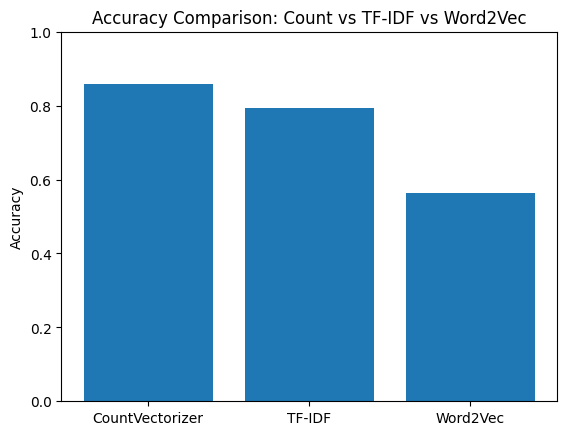

In [9]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

acc_cv   = accuracy_score(y_test, pred_cv)    # CountVectorizer
acc_tf   = accuracy_score(y_test, pred_tf)    # TF-IDF
acc_w2v  = accuracy_score(y_test, pred_w2v)   # Word2Vec

# bar chart
models = ["CountVectorizer", "TF-IDF", "Word2Vec"]
scores = [acc_cv, acc_tf, acc_w2v]

plt.figure()
plt.bar(models, scores)
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison: Count vs TF-IDF vs Word2Vec")
plt.ylim(0, 1)   # because accuracy is between 0 and 1
plt.show()

<h3>Task - 2</h3>

In [10]:
tfidf_13 = TfidfVectorizer(ngram_range=(1,3))
Xtr_13 = tfidf_13.fit_transform(X_train)
Xte_13 = tfidf_13.transform(X_test)

print("Feature size (1,3):", Xtr_13.shape)

lr_13 = LogisticRegression(max_iter=1000)
lr_13.fit(Xtr_13, y_train)

pred_train_13 = lr_13.predict(Xtr_13)
pred_test_13  = lr_13.predict(Xte_13)

print("Train acc (1,3):", accuracy_score(y_train, pred_train_13))
print("Test acc  (1,3):", accuracy_score(y_test,  pred_test_13))


Feature size (1,3): (27481, 416924)
Train acc (1,3): 0.9394126851279065
Test acc  (1,3): 0.9394126851279065


<h3>Task - 3</h3>

In [11]:
#Logistic Regression + TF-IDF
from sklearn.pipeline import Pipeline

lr_pipe = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", LogisticRegression(max_iter=1000))
])

param_grid_lr = {
    "clf__C": [0.01, 0.1, 1, 10]
}

gs_lr = GridSearchCV(
    lr_pipe,
    param_grid_lr,
    cv=3,
    n_jobs=-1,
    scoring="accuracy"
)
gs_lr.fit(X_train, y_train)

print("Best LR:", gs_lr.best_params_, "CV score:", gs_lr.best_score_)
best_lr = gs_lr.best_estimator_
print("Test acc (best LR):", accuracy_score(y_test, best_lr.predict(X_test)))

Best LR: {'clf__C': 1} CV score: 0.6874204768426119
Test acc (best LR): 0.8151086205014374


In [12]:
#MultinomialNB + TF-IDF
nb_pipe = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

param_grid_nb = {
    "clf__alpha": [0.1, 0.5, 1.0, 2.0]
}

gs_nb = GridSearchCV(
    nb_pipe,
    param_grid_nb,
    cv=3,
    n_jobs=-1,
    scoring="accuracy"
)
gs_nb.fit(X_train, y_train)

print("Best NB:", gs_nb.best_params_, "CV score:", gs_nb.best_score_)
best_nb = gs_nb.best_estimator_
print("Test acc (best NB):", accuracy_score(y_test, best_nb.predict(X_test)))


Best NB: {'clf__alpha': 0.5} CV score: 0.6172264768041602
Test acc (best NB): 0.8212947127106001


<h3>Task - 4</h3>

In [13]:
joblib.dump(best_lr, "best_text_pipeline.joblib")

['best_text_pipeline.joblib']